
<center><u><H1>Collaborative Filtering: Memory Based</H1></u></center>

# Memory Based Movie Recommendation System 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
df_movies = pd.read_csv('../Data/ml-100k/u.data', sep='\t', names=header)
df_movies.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


## Data exploration:

In [4]:
n_users = df_movies.user_id.unique().shape[0]
print(n_users)

943


In [8]:
n_items = df_movies.item_id.unique().shape[0]
print(n_items)

1682


(array([ 6110.,     0., 11370.,     0.,     0., 27145.,     0., 34174.,
            0., 21201.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

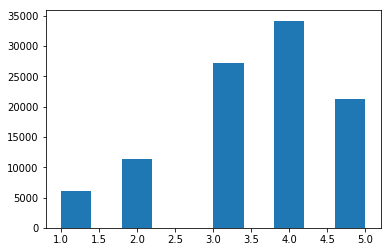

In [9]:
plt.hist(df_movies['rating'])

In [10]:
df_movies.groupby(['rating'])['user_id'].count()

rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: user_id, dtype: int64

In [11]:
# creating a matrix of ratings
_ratings = np.zeros((n_users, n_items))
for row in df_movies.itertuples():
    _ratings[row[1]-1, row[2]-1] = row[3]
_ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [16]:
df_ratings = df_movies.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)
df_ratings.head(10)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
ratings_ = df_movies.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)
ratings_.head(10)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
ratings = ratings_.values
ratings

array([[5., 3., 4., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.]])

In [15]:
ratings.shape

(943, 1682)

In [27]:
from sklearn.metrics.pairwise import pairwise_distances
user_based_similarity = 1-pairwise_distances(ratings, metric='cosine')
item_based_similarity = 1-pairwise_distances(ratings.T, metric='cosine')

In [28]:
user_based_similarity.shape

(943, 943)

In [29]:
item_based_similarity.shape

(1682, 1682)

## Top 10 similar users for the user id 5

In [30]:
pd.DataFrame(user_based_similarity)[:10]

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
0,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
1,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
2,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
3,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
4,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941
5,0.430239,0.245843,0.072415,0.068044,0.237286,1.000000,0.489255,0.201369,0.183951,0.551713,...,0.385838,0.111828,0.190075,0.225142,0.137901,0.111852,0.352449,0.144446,0.317328,0.276042
6,0.440367,0.107328,0.066137,0.091230,0.373600,0.489255,1.000000,0.284951,0.145650,0.487024,...,0.456183,0.114179,0.112422,0.117860,0.153353,0.107027,0.329925,0.059993,0.282003,0.394364
7,0.319072,0.103344,0.083060,0.188060,0.248930,0.201369,0.284951,1.000000,0.085942,0.233289,...,0.239171,0.067626,0.094126,0.096483,0.169737,0.095898,0.246883,0.146145,0.175322,0.299809
8,0.078138,0.161048,0.061040,0.101284,0.056847,0.183951,0.145650,0.085942,1.000000,0.198223,...,0.082199,0.048640,0.163049,0.131415,0.118232,0.039852,0.120495,0.143245,0.092497,0.075617
9,0.376544,0.159862,0.065151,0.060859,0.201427,0.551713,0.487024,0.233289,0.198223,1.000000,...,0.351628,0.074066,0.177044,0.149464,0.100861,0.071460,0.342961,0.090305,0.212330,0.221860


In [31]:
pd.DataFrame(user_based_similarity).loc[4, pd.DataFrame(user_based_similarity).loc[4,:]>0].sort_values(ascending=False)[0:10]

4      1.000000
306    0.478885
647    0.475917
406    0.469131
496    0.464447
659    0.457495
267    0.455785
21     0.455057
621    0.453865
55     0.451375
Name: 4, dtype: float64

## Top 10 similar movies for the movie id 6

In [32]:
pd.DataFrame(item_based_similarity)[:10]

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.000000,0.402382,0.330245,0.454938,0.286714,0.116344,0.620979,0.481114,0.496288,0.273935,...,0.035387,0.000000,0.000000,0.000000,0.035387,0.0,0.0,0.0,0.047183,0.047183
1,0.402382,1.000000,0.273069,0.502571,0.318836,0.083563,0.383403,0.337002,0.255252,0.171082,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.078299,0.078299
2,0.330245,0.273069,1.000000,0.324866,0.212957,0.106722,0.372921,0.200794,0.273669,0.158104,...,0.000000,0.000000,0.000000,0.000000,0.032292,0.0,0.0,0.0,0.000000,0.096875
3,0.454938,0.502571,0.324866,1.000000,0.334239,0.090308,0.489283,0.490236,0.419044,0.252561,...,0.000000,0.000000,0.094022,0.094022,0.037609,0.0,0.0,0.0,0.056413,0.075218
4,0.286714,0.318836,0.212957,0.334239,1.000000,0.037299,0.334769,0.259161,0.272448,0.055453,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.094211
5,0.116344,0.083563,0.106722,0.090308,0.037299,1.000000,0.139617,0.083876,0.151064,0.203097,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
6,0.620979,0.383403,0.372921,0.489283,0.334769,0.139617,1.000000,0.423515,0.527462,0.318623,...,0.000000,0.051498,0.000000,0.000000,0.051498,0.0,0.0,0.0,0.051498,0.051498
7,0.481114,0.337002,0.200794,0.490236,0.259161,0.083876,0.423515,1.000000,0.424429,0.267764,...,0.000000,0.082033,0.065627,0.065627,0.082033,0.0,0.0,0.0,0.082033,0.000000
8,0.496288,0.255252,0.273669,0.419044,0.272448,0.151064,0.527462,0.424429,1.000000,0.288514,...,0.000000,0.000000,0.057360,0.057360,0.071700,0.0,0.0,0.0,0.057360,0.071700
9,0.273935,0.171082,0.158104,0.252561,0.055453,0.203097,0.318623,0.267764,0.288514,1.000000,...,0.000000,0.000000,0.080264,0.080264,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [33]:
pd.DataFrame(item_based_similarity).loc[5, pd.DataFrame(item_based_similarity).loc[5,:]>0].sort_values(ascending=False)[0:10]

5       1.000000
1369    0.334204
1128    0.289183
1195    0.287678
220     0.285461
1201    0.283235
765     0.282291
546     0.276542
12      0.270861
1552    0.270590
Name: 5, dtype: float64

In [34]:
def item_based_pred(rating_mat, sim_mat):
    pred = rating_mat.dot(sim_mat) / np.array([np.abs(sim_mat).sum(axis=1)])
    return pred

In [35]:
def user_based_pred(rating_mat, sim_mat):
    mean_user_rating = rating_mat.mean(axis=1)
    ratings_diff = (rating_mat - mean_user_rating[:, np.newaxis])
    return mean_user_rating[:, np.newaxis] + sim_mat.dot(ratings_diff) / np.array([np.abs(sim_mat).sum(axis=1)]).T

In [36]:
item_based_prediction = item_based_pred(ratings, item_based_similarity)
user_based_prediction = user_based_pred(ratings, user_based_similarity)

In [37]:
item_based = pd.DataFrame(item_based_prediction)
item_based[:10]

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.215603,1.116938,1.143155,1.152897,1.044358,1.095638,1.203018,1.141049,1.162100,1.110017,...,1.092314,1.184760,0.667585,0.667585,1.303448,0.155240,0.155240,0.155240,1.114205,1.503711
1,0.266254,0.155366,0.216833,0.184680,0.172752,0.247071,0.253118,0.203732,0.280860,0.254480,...,0.332700,0.152221,0.255409,0.255409,0.370405,0.363032,0.363032,0.363032,0.144958,0.116938
2,0.108555,0.080347,0.105074,0.088995,0.090528,0.086766,0.118046,0.089999,0.114122,0.100940,...,0.090431,0.032131,0.307658,0.307658,0.140652,0.596573,0.596573,0.596573,0.090083,0.032300
3,0.099211,0.072787,0.088526,0.075906,0.077852,0.066951,0.099893,0.076670,0.093297,0.071345,...,0.137240,0.073285,0.101259,0.101259,0.162757,0.447674,0.447674,0.447674,0.069636,0.037698
4,0.640354,0.642848,0.555897,0.593990,0.551931,0.334977,0.597601,0.584832,0.513914,0.484530,...,0.521391,0.540090,0.244917,0.244917,0.375427,0.001603,0.001603,0.001603,0.579812,0.553527
5,0.905826,0.714490,0.696986,0.851622,0.658166,0.835756,0.878034,0.950360,0.947371,0.917757,...,1.362069,1.718740,0.441644,0.441644,1.460852,0.203904,0.203904,0.203904,0.731589,0.810879
6,1.718684,1.650144,1.455908,1.762653,1.554733,1.240378,1.710391,1.799230,1.687167,1.685264,...,2.666712,2.617867,0.794729,0.794729,1.630621,0.222623,0.222623,0.222623,1.690790,1.744107
7,0.328365,0.329643,0.275321,0.315215,0.273240,0.177140,0.327218,0.295514,0.285063,0.248793,...,0.214217,0.277361,0.247183,0.247183,0.275544,0.064947,0.064947,0.064947,0.369210,0.296181
8,0.108343,0.082109,0.086629,0.091593,0.079729,0.146378,0.109421,0.099440,0.112164,0.100737,...,0.152706,0.119752,0.073157,0.073157,0.112651,0.132341,0.132341,0.132341,0.077088,0.074522
9,0.892397,0.745978,0.720331,0.902623,0.717958,0.818727,0.896023,0.943838,0.947081,0.911016,...,1.581295,1.600103,0.501896,0.501896,1.230628,0.171044,0.171044,0.171044,0.857522,0.850408


In [38]:
user_based = pd.DataFrame(user_based_prediction)
user_based[:10]

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,2.695232,1.028553,0.714744,1.569609,0.729177,0.410094,2.417727,1.675929,1.852264,0.779362,...,0.273778,0.276886,0.273962,0.272745,0.275916,0.270580,0.271118,0.270849,0.276821,0.277672
1,1.814992,0.257962,0.234938,0.574352,0.172646,0.049902,1.491545,0.700534,1.320586,0.333219,...,-0.064676,-0.065240,-0.063865,-0.065092,-0.063198,-0.065860,-0.062492,-0.064176,-0.064774,-0.065632
2,1.234233,0.196659,0.141916,0.441848,0.133938,-0.023772,1.149862,0.508257,0.871339,0.175614,...,-0.092863,-0.093202,-0.087589,-0.089812,-0.091125,-0.090081,-0.081725,-0.085903,-0.091640,-0.093077
3,1.471333,0.218540,0.136274,0.491615,0.128348,-0.060891,1.284300,0.559093,0.917543,0.122948,...,-0.129767,-0.129654,-0.128845,-0.130022,-0.128186,-0.129432,-0.123541,-0.126486,-0.129561,-0.130948
4,2.598075,0.843694,0.421290,1.341758,0.464214,0.075539,2.171684,1.460199,1.406886,0.438881,...,-0.025705,-0.022648,-0.026474,-0.027419,-0.025459,-0.029305,-0.029296,-0.029300,-0.022424,-0.023025
5,2.395083,0.766525,0.506119,1.334774,0.525871,0.297092,2.096219,1.575232,1.763679,0.672798,...,0.158487,0.163714,0.157088,0.156010,0.160810,0.154272,0.155105,0.154689,0.159268,0.159181
6,2.960644,1.401948,1.018650,1.985118,1.097727,0.741473,2.698695,2.141686,2.186444,1.139299,...,0.622384,0.626437,0.620436,0.619346,0.622298,0.617439,0.617990,0.617714,0.624154,0.623589
7,2.126288,0.635978,0.222312,1.097772,0.273464,-0.069179,1.907944,1.118065,1.192334,0.244882,...,-0.158737,-0.155663,-0.156630,-0.158098,-0.156996,-0.160700,-0.160032,-0.160366,-0.153897,-0.155713
8,1.788274,0.271819,0.131069,0.655492,0.118464,-0.006592,1.655089,0.813010,1.226646,0.223974,...,-0.181952,-0.180420,-0.181226,-0.182448,-0.181257,-0.183654,-0.181177,-0.182416,-0.181429,-0.181136
9,2.366634,0.798741,0.514332,1.414823,0.564269,0.292956,2.155329,1.585861,1.773550,0.672303,...,0.153894,0.158442,0.152497,0.151241,0.155189,0.149088,0.149808,0.149448,0.155029,0.154338


## Predictions for movies that the user 6 hasn't rated yet on USER_BASED

In [39]:
predictions = user_based.loc[6,pd.DataFrame(ratings).loc[4,:] == 0]

In [40]:
predictions[4]

1.0977273391792437

In [41]:
top_values = predictions.sort_values(ascending=False).head(n=5)

In [42]:
recommendations = pd.DataFrame(data=top_values)
recommendations.columns = ['Predicted Rating']
print(recommendations)

     Predicted Rating
55           3.232746
126          3.117181
317          2.833637
63           2.776077
194          2.745779


In [43]:
item_based = pd.DataFrame(item_based_prediction)
item_based[:5]

,0,1,2,3,4,5,6,7,8,9,...,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,1.215603,1.116938,1.143155,1.152897,1.044358,1.095638,1.203018,1.141049,1.162100,1.110017,...,1.092314,1.184760,0.667585,0.667585,1.303448,0.155240,0.155240,0.155240,1.114205,1.503711
1,0.266254,0.155366,0.216833,0.184680,0.172752,0.247071,0.253118,0.203732,0.280860,0.254480,...,0.332700,0.152221,0.255409,0.255409,0.370405,0.363032,0.363032,0.363032,0.144958,0.116938
2,0.108555,0.080347,0.105074,0.088995,0.090528,0.086766,0.118046,0.089999,0.114122,0.100940,...,0.090431,0.032131,0.307658,0.307658,0.140652,0.596573,0.596573,0.596573,0.090083,0.032300
3,0.099211,0.072787,0.088526,0.075906,0.077852,0.066951,0.099893,0.076670,0.093297,0.071345,...,0.137240,0.073285,0.101259,0.101259,0.162757,0.447674,0.447674,0.447674,0.069636,0.037698
4,0.640354,0.642848,0.555897,0.593990,0.551931,0.334977,0.597601,0.584832,0.513914,0.484530,...,0.521391,0.540090,0.244917,0.244917,0.375427,0.001603,0.001603,0.001603,0.579812,0.553527


## Predictions for movies that the user 6 hasn't rated yet on ITEM_BASED

In [44]:
predictions_ = item_based.loc[6,pd.DataFrame(ratings).loc[6,:] == 0]

In [45]:
top_values_ = predictions_.sort_values(ascending=False).head(n=3)

In [46]:
recommendations_ = pd.DataFrame(data=top_values_)
recommendations_.columns = ['Predicted Rating']
print(recommendations)

     Predicted Rating
55           3.232746
126          3.117181
317          2.833637
63           2.776077
194          2.745779


## Calculating Metrics (RMSE):

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [48]:
def rmse(pred,actual):
    prediction = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, actual))

In [49]:
print('User-based CF RMSE:' + str(rmse(user_based_prediction, ratings)))

User-based CF RMSE:2.691101891161349


In [50]:
print('Item-based CF RMSE:' + str(rmse(item_based_prediction, ratings)))

Item-based CF RMSE:2.950193296897328


In [51]:
from sklearn.metrics.pairwise import cosine_similarity

In [52]:
cosine_sim = cosine_similarity(ratings_, ratings_)

In [53]:
df_cosine = pd.DataFrame(cosine_sim, index=ratings_.index, columns=ratings_.index)
df_cosine.head(10)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
user_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.166931,0.047460,0.064358,0.378475,0.430239,0.440367,0.319072,0.078138,0.376544,...,0.369527,0.119482,0.274876,0.189705,0.197326,0.118095,0.314072,0.148617,0.179508,0.398175
2,0.166931,1.000000,0.110591,0.178121,0.072979,0.245843,0.107328,0.103344,0.161048,0.159862,...,0.156986,0.307942,0.358789,0.424046,0.319889,0.228583,0.226790,0.161485,0.172268,0.105798
3,0.047460,0.110591,1.000000,0.344151,0.021245,0.072415,0.066137,0.083060,0.061040,0.065151,...,0.031875,0.042753,0.163829,0.069038,0.124245,0.026271,0.161890,0.101243,0.133416,0.026556
4,0.064358,0.178121,0.344151,1.000000,0.031804,0.068044,0.091230,0.188060,0.101284,0.060859,...,0.052107,0.036784,0.133115,0.193471,0.146058,0.030138,0.196858,0.152041,0.170086,0.058752
5,0.378475,0.072979,0.021245,0.031804,1.000000,0.237286,0.373600,0.248930,0.056847,0.201427,...,0.338794,0.080580,0.094924,0.079779,0.148607,0.071459,0.239955,0.139595,0.152497,0.313941
6,0.430239,0.245843,0.072415,0.068044,0.237286,1.000000,0.489255,0.201369,0.183951,0.551713,...,0.385838,0.111828,0.190075,0.225142,0.137901,0.111852,0.352449,0.144446,0.317328,0.276042
7,0.440367,0.107328,0.066137,0.091230,0.373600,0.489255,1.000000,0.284951,0.145650,0.487024,...,0.456183,0.114179,0.112422,0.117860,0.153353,0.107027,0.329925,0.059993,0.282003,0.394364
8,0.319072,0.103344,0.083060,0.188060,0.248930,0.201369,0.284951,1.000000,0.085942,0.233289,...,0.239171,0.067626,0.094126,0.096483,0.169737,0.095898,0.246883,0.146145,0.175322,0.299809
9,0.078138,0.161048,0.061040,0.101284,0.056847,0.183951,0.145650,0.085942,1.000000,0.198223,...,0.082199,0.048640,0.163049,0.131415,0.118232,0.039852,0.120495,0.143245,0.092497,0.075617


In [54]:
def CF_user(user_id, movie_id):
    if movie_id in df_ratings:
        sim_scores = df_cosine[user_id]
        ratings = df_ratings[movie_id]
        idx = df_ratings[ratings.isnull()].index
        ratings = ratings.dropna()
        sim_scores = sim_scores.drop(idx)
        mean_rating = np.dot(sim_scores, ratings)/sim_scores.sum()
    else:
        mean_rating = 3.0
    return mean_rating    

In [55]:
sim_scores = cosine_sim[4]

In [56]:
len(sim_scores)

943

In [57]:
CF_user(6,4)

1.1809183485915022

## Reference:

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html